# Homework 7 - Classification
In this assignment, we will be applying some basic classification methods to the soccer database (found on canvas). We will first need to import all the libraries required for this guide.

## Instructions
In this assignment, you will be performing the specified classification methods in Python.

---

### Step 1: Load Data

- Load the following attributes from `Player_Attributes`:
  - `gk_reflexes`
  - `gk_kicking`
  - `gk_handling`

These values will be used for classification.

---

### Step 2: Classification (Part 1)

- Use `gk_reflexes` and `gk_kicking`.
- Choose one of the attributes as the **target attribute**.
- Generate **five classes** in the target property by reducing the range of values in the target data.
- Split the data into **training** and **testing** sets.
- Apply the following methods and print the resulting `accuracy_score` from `sklearn.metrics`:
  - Logistic Regression
  - Support Vector Machine (SVM)
  - Decision Tree
  - K-Nearest Neighbors (KNN)

---

### Step 3: Classification (Part 2)

- Repeat **Step 2**, this time using:
  - `gk_kicking` and `gk_handling`

- Again, print the corresponding `accuracy_score` for each classification method.

---

### Step 4: Analysis (Comment in Python file)

Answer the following question as a **comment** in your Python file:

> Since this assignment (Classification) and the previous assignment (Regression) are with the same data, can you compare and conclude which technique is yielding best results?

---

### Dataset Overview
The dataset covers information about soccer players in sqlite format. This file is located in the `Datasets` directory of this repository. The file is called `fifa_soccer_dataset.sqlite.gz`. **This is the same file from the previous homework (assignment 4).**

If you haven't decompressed the file, you may need to follow the instructions below to decompress it.

**IMPORTANT** The database is compressed and needs to be decompressed before use. You can do this by running the following command in your terminal on Linux or MacOS:

```bash
gunzip Datasets/fifa_soccer_dataset.sqlite.gz
```

If you are using Windows, you can use the following command in your powershell:

```powershell
$sourceFile = "$PWD\Datasets\fifa_soccer_dataset.sqlite.gz"
$destinationFile = "$PWD\Datasets\fifa_soccer_dataset.sqlite"

$inputStream = [System.IO.File]::OpenRead($sourceFile)
$outputStream = [System.IO.File]::Create($destinationFile)
$gzipStream = New-Object System.IO.Compression.GzipStream($inputStream, [System.IO.Compression.CompressionMode]::Decompress)
$gzipStream.CopyTo($outputStream)

$gzipStream.Close()
$outputStream.Close()
$inputStream.Close()
```

Alternatively, you can extract the file using the GUI of your operating system.


### Submission Guidelines

- Submit your completed notebook as a HTML export, or a PDF file.

To export to HTML, if you are on Jupyter, select `File` > `Export Notebook As` > `HTML`.

If you are on VSCode, you can use the `Jupyter: Export to HTML` command.
 - Open the command palette (Ctrl+Shift+P or Cmd+Shift+P on Mac).
     - Search for `Jupyter: Export to HTML`.
     - Save the HTML file to your computer and submit it via Canvas.

---


In [1]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import os

# Local directory
print(os.getcwd())

import time


c:\Ricardo\2025-02 SP25 USABLE ARTIFICIAL INTELLIGENCE\GitHub\usable_ai\Homework


To start this assignment, we first need to connect to the sqlite database, do so below.

In [2]:
# Input Code Here
dataset_path = "../Database/fifa_soccer_dataset.sqlite" # Fix your path accordingly

# Your Code Here
conn = sqlite3.connect(dataset_path)

Now connected, let's grab required attributes for the scenario from the `Player_Attributes`(Using gk_reflexes and gk_kicking) table.

In [3]:
# Your Code Here

player_attr_df = pd.read_sql("SELECT gk_reflexes, gk_kicking, gk_handling FROM Player_Attributes;", conn)

player_attr_df.head()

,gk_reflexes,gk_kicking,gk_handling
0,8.0,10.0,11.0
1,8.0,10.0,11.0
2,8.0,10.0,11.0
3,7.0,9.0,10.0
4,7.0,9.0,10.0


Droping the rows with are having missing values

In [4]:
 # Your Code Here

print('Before Missing values:\n', player_attr_df.isna().sum())
print('\nBefore shape:', player_attr_df.shape)

# gk_handling as the dependent  
# gk_reflexes independent
# gk_kicking 

player_attr_df = player_attr_df.dropna(subset=['gk_handling', 'gk_reflexes', 'gk_kicking'])

print('\nAfter Missing values:\n', player_attr_df.isna().sum())
print('\nAfter shape:', player_attr_df.shape)

Before Missing values:
 gk_reflexes    836
gk_kicking     836
gk_handling    836
dtype: int64

Before shape: (183978, 3)

After Missing values:
 gk_reflexes    0
gk_kicking     0
gk_handling    0
dtype: int64

After shape: (183142, 3)


For this classifying, we'll be using the ` gk_reflexes` and `gk_kicking`. Pull these values into `x` and `y`.

In [5]:
# x = player_attr_df[['']].values # Your Code Here
# y = player_attr_df[['']].values # Your Code Here

x = player_attr_df[['gk_reflexes']].values # Your Code Here
y = player_attr_df[['gk_kicking']].values # Your Code Here

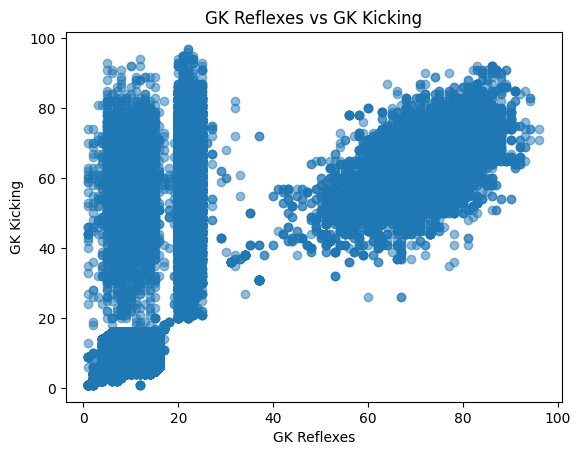

In [6]:
import matplotlib.pyplot as plt

# Plot the data
plt.scatter(x, y, alpha=0.5)
plt.xlabel("GK Reflexes")
plt.ylabel("GK Kicking")
plt.title("GK Reflexes vs GK Kicking")
plt.show()

the target variable should be reduced to just 5 classes. 

In [7]:
# ____ =  pd.cut(data['gk_reflexes'], bins=5, labels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

classes = pd.cut(player_attr_df['gk_reflexes'], bins=5, labels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

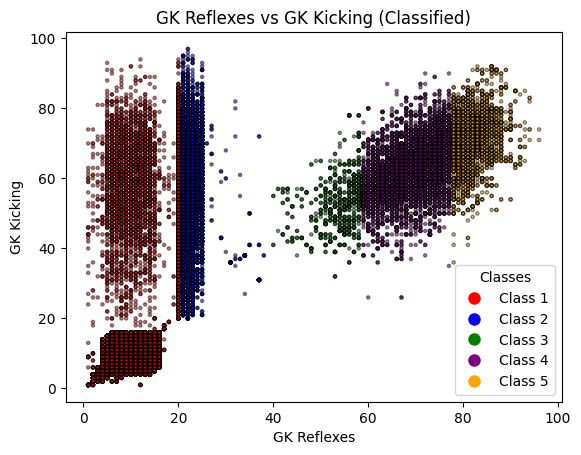

In [8]:
# Define colors for each class
colors = {'Class 1': 'red', 'Class 2': 'blue', 'Class 3': 'green', 'Class 4': 'purple', 'Class 5': 'orange'}
class_colors = [colors[c] for c in classes]

# Plot the data with colors based on classes
plt.scatter(x, y, c=class_colors, alpha=0.5,edgecolors="black", s=5)

plt.xlabel("GK Reflexes")
plt.ylabel("GK Kicking")
plt.title("GK Reflexes vs GK Kicking (Classified)")

# Add legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=cls, markersize=10, markerfacecolor=col) for cls, col in colors.items()]
plt.legend(handles=legend_elements, title="Classes")

plt.show()

Let's split the data set into test and training sets using the `train_test_split()` function. We'll want to transform our `x` variable, which can be done by calling the `transform()` function.

In [9]:
# To sum up, the classes are just a way to redefine the problem as a classification task 
# (predicting the bin/class for gk_reflexes or gk_kicking ). 
# So x is one of the features and y is the class (e.g., 0,1,2,3 or 4) for the other feature.

classes = pd.cut(player_attr_df['gk_reflexes'], bins=5, labels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

x = player_attr_df[['gk_kicking']].values 

In [10]:
# 20% for training

X_train, X_test, y_train, y_test = train_test_split(x, classes, test_size=0.2, random_state=42) # Your Code Here
sc= StandardScaler()
sc.fit(X_train)
X_train_std= sc.fit_transform(X_train) # Your Code Here
# Use transformation as a way to apply the transformation found in X_train
X_test_std= sc.transform(X_test) # Your Code Here

To preform a logistic regression, we'll use the `LogisticRegression()` function. This may take a couple moments to run.

In [11]:
start_time_1 = time.time()

lr= LogisticRegression(C=1000.0, random_state=0,max_iter=1000) #Your Code Here
lr.fit(X_train_std, y_train.to_numpy())  # .ravel() will be deprecated
y_pred= lr.predict(X_test_std)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

end_time_1 = time.time()

Accuracy: 0.8526304294411532


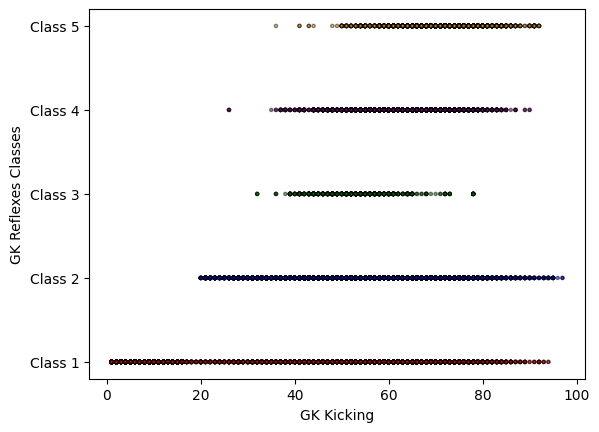

In [12]:
# Plot the data with colors based on classes
plt.scatter(x, classes, c=class_colors, alpha=0.5,edgecolors="black", s=5)

plt.xlabel("GK Kicking")
plt.ylabel("GK Reflexes Classes")

plt.show()

Great! Let's try applying SVM instead. Try using `SVC()` below, then use the same prediction and output methods as the above cell.

In [13]:
start_time_2 = time.time()

svm= SVC(kernel='linear', C=1.0, random_state=0, cache_size=7000) # Your Code Here
svm.fit(X_train_std, y_train.to_numpy())     # ravel() will be deprecated
y_pred = svm.predict(X_test_std) # Your Prediction Code Here

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

end_time_2 = time.time()

Accuracy: 0.8646154686177618


Let's try using a KNeightbors Classifier. We can call the `KNeighborsClassifier()` function, and supply 2 parameters: `n_neighbors=5` and `matric='euclidean`. Once you run this method, display the accuracy of your model as you did in the above cells.

In [14]:
start_time_3 = time.time()

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') # Your Code here

#Your Code to fit the model here
knn.fit(X_train_std, y_train)

y_pred_knn = knn.predict(X_test_std) # Your Prediction Code Here

# Your Accuracy Output Code Here
print(f'Accuracy (KNN): {accuracy_score(y_test, y_pred_knn)}')

end_time_3 = time.time()

Accuracy (KNN): 0.859947036501133


In [15]:
# Print execution times
print(f"Execution time of LReg: {end_time_1 - start_time_1:.6f} seconds")
print(f"Execution time of SVM: {end_time_2 - start_time_2:.6f} seconds")
print(f"Execution time of KNN: {end_time_3 - start_time_3:.6f} seconds")

Execution time of LReg: 0.624746 seconds
Execution time of SVM: 213.034944 seconds
Execution time of KNN: 2.621582 seconds


let's repeat the above steps agian with gk_kicking and gk_handling.

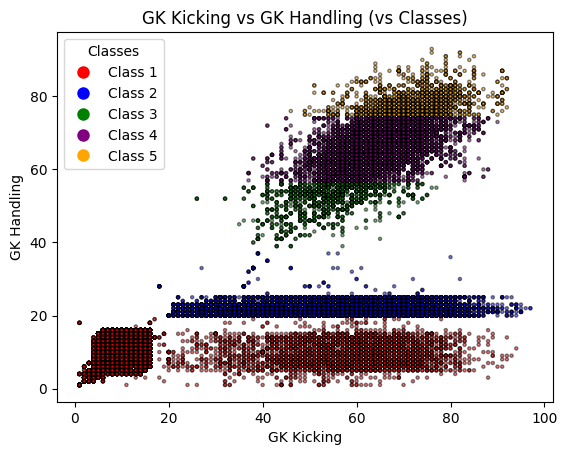

In [16]:
# Your Code Here

# Doing classes over gk_handling

x = player_attr_df[['gk_kicking']].values 
y = player_attr_df[['gk_handling']].values 

classes = pd.cut(player_attr_df['gk_handling'], bins=5, labels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

# Define colors for each class
colors = {'Class 1': 'red', 'Class 2': 'blue', 'Class 3': 'green', 'Class 4': 'purple', 'Class 5': 'orange'}
class_colors = [colors[c] for c in classes]

# Plot the data with colors based on classes
plt.scatter(x, y, c=class_colors, alpha=0.5,edgecolors="black", s=5)

plt.xlabel("GK Kicking")
plt.ylabel("GK Handling")
plt.title("GK Kicking vs GK Handling (vs Classes)")

# Add legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=cls, markersize=10, markerfacecolor=col) for cls, col in colors.items()]
plt.legend(handles=legend_elements, title="Classes")

plt.show()


In [17]:
# Prepare data for training

X_train, X_test, y_train, y_test = train_test_split(x, classes, test_size=0.2, random_state=42) # Your Code Here
sc= StandardScaler()
sc.fit(X_train)
X_train_std= sc.fit_transform(X_train) # Your Code Here
# Use transformation as a way to apply the transformation found in X_train
X_test_std= sc.transform(X_test) # Your Code Here

In [18]:
# Run Logistic Regression

lr= LogisticRegression(C=1000.0, random_state=0,max_iter=1000) #Your Code Here
lr.fit(X_train_std, y_train.to_numpy())  # ravel() will be deprecated
y_pred= lr.predict(X_test_std)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8795216904638401


In [19]:
# Run SVM (Support Vector Machine) - SVC() Support Vector Classification

svm= SVC(kernel='linear', C=1.0, random_state=0, cache_size=7000) # Your Code Here
svm.fit(X_train_std, y_train.to_numpy())  # ravel() will be deprecated
y_pred = svm.predict(X_test_std) # Your Prediction Code Here

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8939364984029048


In [20]:
# Doing KNN

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') # Your Code here

#Your Code to fit the model here
knn.fit(X_train_std, y_train)

y_pred_knn = knn.predict(X_test_std) # Your Prediction Code Here

# Your Accuracy Output Code Here
print(f'Accuracy (KNN): {accuracy_score(y_test, y_pred_knn)}')

Accuracy (KNN): 0.8899505856015725


Lastly, in the cell below, answer the question:
Since this assignment (Classification) and the previous assignment (Regression) are with the same data, can you compare and conclude which technique is yielding best results?

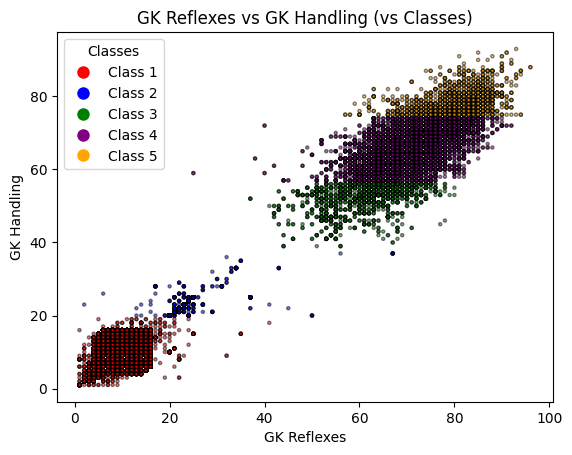

In [21]:
# Making the comparison HW6 Regression was about x :: `gk_reflexes` and y :: `gk_handling`
# Then apply classification between classes of `gk_handling`

x = player_attr_df[['gk_reflexes']].values 
y = player_attr_df[['gk_handling']].values 

classes = pd.cut(player_attr_df['gk_handling'], bins=5, labels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

# Define colors for each class
colors = {'Class 1': 'red', 'Class 2': 'blue', 'Class 3': 'green', 'Class 4': 'purple', 'Class 5': 'orange'}
class_colors = [colors[c] for c in classes]

# Plot the data with colors based on classes
plt.scatter(x, y, c=class_colors, alpha=0.5,edgecolors="black", s=5)

plt.xlabel("GK Reflexes")
plt.ylabel("GK Handling")
plt.title("GK Reflexes vs GK Handling (vs Classes)")

# Add legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=cls, markersize=10, markerfacecolor=col) for cls, col in colors.items()]
plt.legend(handles=legend_elements, title="Classes")

plt.show()

In [22]:
# Prepare data for training

X_train, X_test, y_train, y_test = train_test_split(x, classes, test_size=0.2, random_state=42) # Your Code Here
sc= StandardScaler()
sc.fit(X_train)
X_train_std= sc.fit_transform(X_train) # Your Code Here
# Use transformation as a way to apply the transformation found in X_train
X_test_std= sc.transform(X_test) # Your Code Here

In [23]:
# Run Logistic Regression

lr= LogisticRegression(C=1000.0, random_state=0,max_iter=1000) #Your Code Here
lr.fit(X_train_std, y_train.to_numpy())  # ravel() will be deprecated
y_pred= lr.predict(X_test_std)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9811351661252014


#Your Answer Here

In principle we are looking to different approaches:

- **Classification** will be about discriminate in buckets (classes), so the accuracy of 98.11% relates to placing the observation in the right bucket (`GK_handling` class) according to `gk_reflexes`.

- **Regression** will be about how well the dependent variable (`gk_handling`) can be explained by the independent variable (`gk_reflexes`), and the linear regression model showed a R-squared of 93.34% which can explain the variance of the dependent variable.

Depending of the application of then one or the other approach could be more convenient or yield the best results, e.g. if we are interested in a "fine-grained"prediction then regression could be the path, however, if segregate groups (or bucket) is more important and no matter that much the specific predicted value then logistic regression could be a better choice. 



